In [ ]:
install.packages("tseries") 
install.packages("tidyverse")
install.packages("dplyr")
install.packages("readxl")
install.packages("TTR")
install.packages("forecast")
install.packages("lmtest")
install.packages("FitAR")
install.packages("randtests")
install.packages("seasonalview")
install.packages("moments")

In [7]:
library("tseries") 
library("tidyverse")
library("dplyr")
library("readxl")
library("TTR")
library("forecast")
library("lmtest")
library("FitAR")
library("randtests")
library("seasonalview")
library("moments")

ERROR: ignored

### Tema de alguns gráficos

In [ ]:
tema = theme(panel.background = element_rect(fill='black'),
        panel.grid =element_blank(),
        plot.background = element_rect(fill='black'),
        axis.text = element_text(colour='white',size=10), 
        #panel.grid.major.x = element_line(colour='grey60',linetype = 4,size = 0.2),
        panel.grid.major.y = element_line(colour='white',linetype = 1,size = 0.1),
        axis.line = element_line(colour='white'),
        axis.title=element_text(colour='white'),
        plot.title = element_text(colour='white'))

### Leitura do Dataset
## Dataset extraido de: https://sie.energia.gob.mx/bdiController.do?action=cuadro&subAction=applyOptions
# Exportação de preços de Petróleo Mexicano

In [10]:
df <-
  read.csv(
    'preco.csv',
    sep = "," ,
    dec = ',',
    header = T,
    stringsAsFactors = FALSE
  )

### Transformar em Série Temporal

In [11]:
df_series = ts(df, start=c(2013,1), frequency = 12)
df_series

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2013,97.98278,103.35294,100.77090,97.75538,97.90686,96.99315,99.67255,99.24414,98.14572,93.87329,88.48590,89.40966
2014,88.31081,90.82224,91.39522,93.88863,95.08631,97.01105,93.32017,89.50745,84.12824,72.50936,63.47980,50.18138
2015,40.45127,45.98606,46.01733,49.32555,52.03910,52.82573,45.16595,38.41927,36.29036,34.86077,32.50883,26.19610
2016,23.10238,23.72933,28.32656,31.33582,36.72636,39.80715,37.97153,37.74090,36.82666,40.66836,38.36162,42.32596
2017,44.50008,44.17497,41.93243,43.22118,43.85074,41.15105,43.87771,45.55484,48.16237,48.89114,53.34505,54.05576
2018,57.45399,56.15676,57.22458,58.15973,62.89929,64.63686,66.42162,64.26567,68.36348,71.15330,59.82583,51.86867
2019,54.05666,57.37981,59.46449,62.07703,60.33674,56.90537,57.87580,49.58496,55.05522,51.00463,50.68969,54.54901
2020,49.79299,44.63505,28.92302,,,,,,,,,


### Plotar o gráfico da Série Temporal - Percebemos que visualmente aparenta não ser estacionária 

### Como podemos observar na figura abaixo temos indicios de não estacionariedade, uma vez que o périodo observado a média não aparenta ser constante. Portanto, para verificarmos a hipótese de estacionariedade iremos realizar o Teste de Dickey-Fuller.

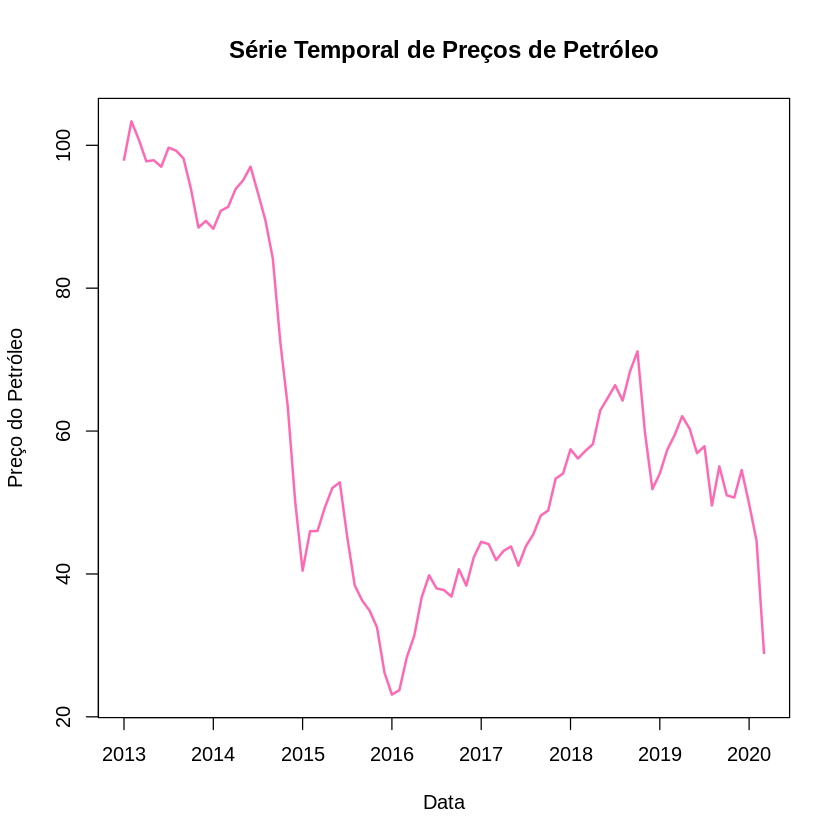

In [12]:
plot(df_series,  main="Série Temporal de Preços de Petróleo", ylab="Preço do Petróleo",xlab="Data", col="#FF69B4", lty= 1,lwd =2)

## ADF é o teste de Dickey-Fuller

### Teste de estacionariedade de Dickey-Fuller Aumentado (Dickey & Fuller, 1979) , com as seguintes hipóteses: 
### H0 : a série não é estacionária 
### H1 : a série é estacionária 
### Regra de decisão: Quando o nível descritivo é < 0,05 rejeitamos H0 , ou seja, existem evidências de que a série é estacionária.


### Realizar o Teste de Estacionariedade - Como o p-value é maior que 0.05, portanto a série não é estacionária.

### Iremos realizar o teste com o nivel de significância α = 0.05. O nivel de significancia é a probabilidade de rejeição da hipótese nula quando ela é verdadeira.Por exemplo, um nível de significância de 0,05 indica um risco de 5% de concluir que existe uma diferença quando não há diferença real.

### O Resultado deu p-value = 0.7328. Portanto, é maior que 0.05, logo não é estacionária





In [13]:
adf.test(df_series)


	Augmented Dickey-Fuller Test

data:  df_series
Dickey-Fuller = -1.6185, Lag order = 4, p-value = 0.7328
alternative hypothesis: stationary


### Como obtemos um valor p =0.7328 > $\alpha = 0.05$, portanto, não temos evidências para rejeitar a hipótese nula. Assim, temos fortes indícios de não estacionariedade. Portanto, vamos realizar a diferenciação a fim de tentar fazer com a série se torne estacionária.

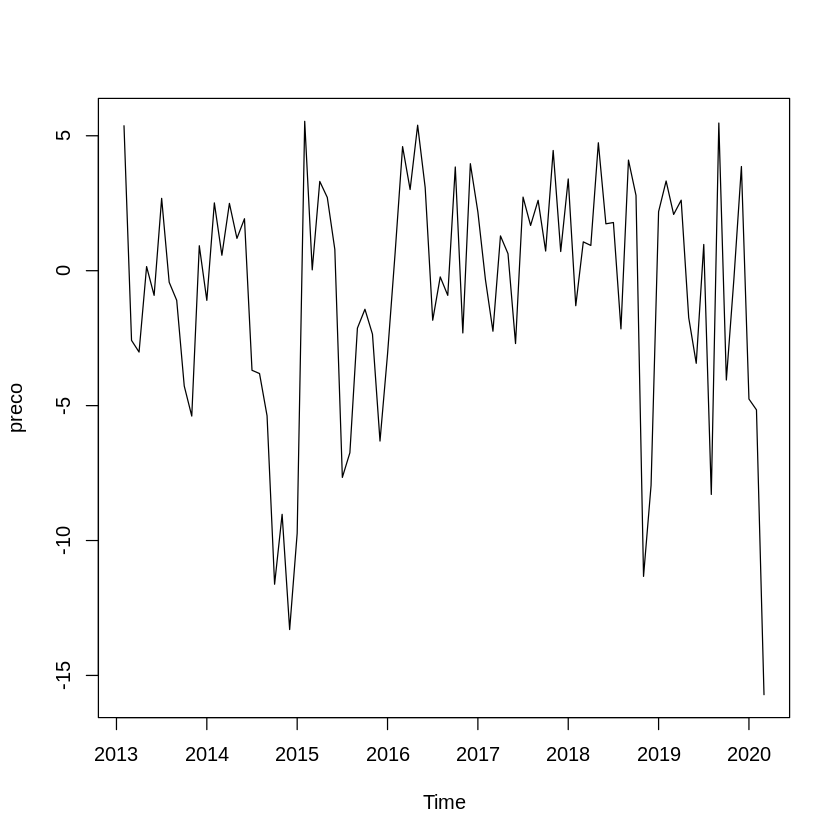

In [14]:
serie_dif1 = diff(df_series)
plot(serie_dif1)

## Realizar novamente o teste para verificar se a série se tornou estacionária

In [15]:
adf.test(serie_dif1)


	Augmented Dickey-Fuller Test

data:  serie_dif1
Dickey-Fuller = -3.3327, Lag order = 4, p-value = 0.07162
alternative hypothesis: stationary


### Como obtemos um valor p =0.071 > $\alpha = 0.05$, portanto, não temos evidências para rejeitar a hipótese nula ainda. Assim, temos fortes indícios de não estacionariedade. Portanto, vamos realizar a diferenciação novamente a fim de tentar fazer com a série se torne estacionária.

In [16]:
serie_dif2 = diff(serie_dif1)

In [17]:
adf.test(serie_dif2)

Warning message in adf.test(serie_dif2):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  serie_dif2
Dickey-Fuller = -5.1673, Lag order = 4, p-value = 0.01
alternative hypothesis: stationary


### Como obtemos um valor p =0.01 < 0.05. Temos evidências para crer que a série é estacionária. Portanto, rejeitamos a hipótese nula. Realizar o gráfico

Warning message in log(serie_dif2):
“NaNs produced”


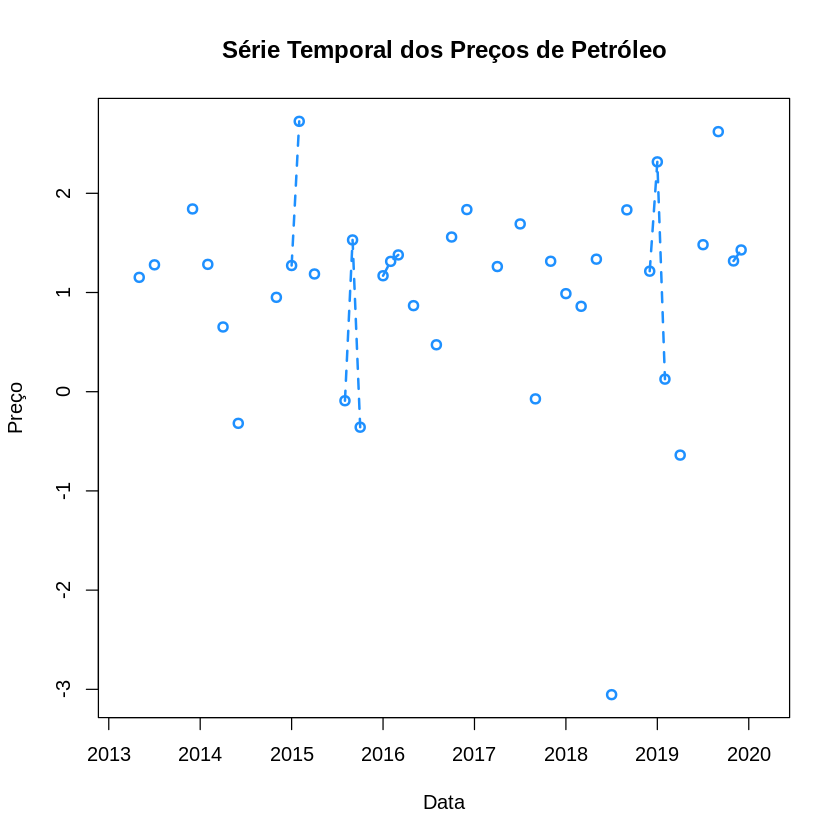

In [18]:
plot(log(serie_dif2), type="o", lty="dashed",ylab = "Preço",xlab="Data",main="Série Temporal dos Preços de Petróleo",col="#1E90FF",lwd =2)

### Com a série estácionaria conseguimos ajustar o modelo do arima, sabemos que o i está relacionado com a diferenciação, logo i =2.

### Analisar os gráficos acf e pacf para verificar as ordens da média movel(MA) e auto-regressão(AR).

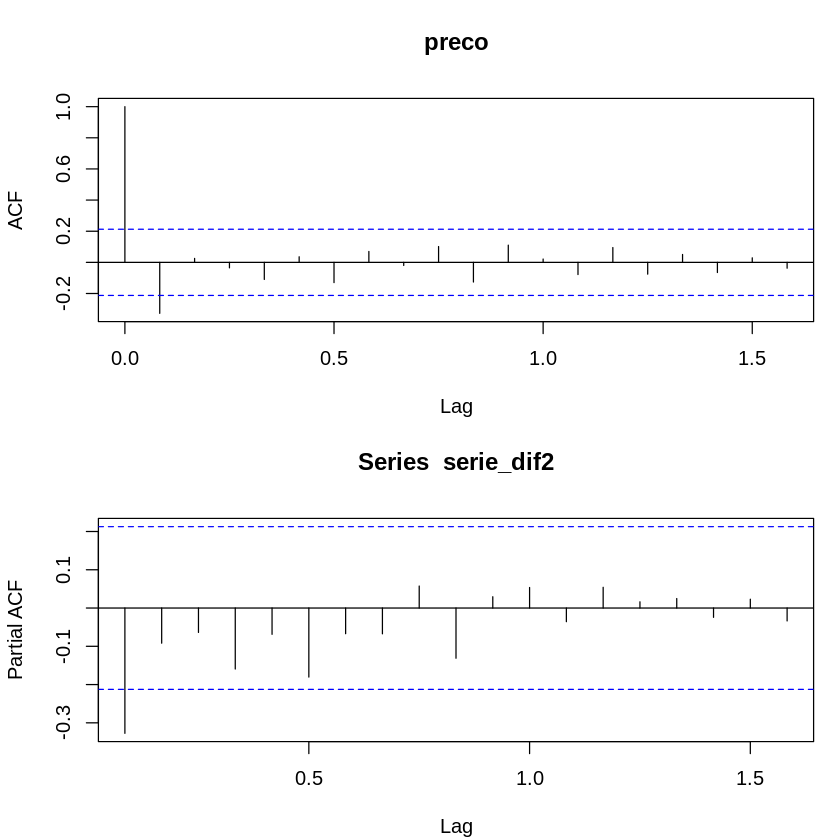

In [19]:
par(mfrow=c(2,1), mar=c(4,4,4,1)+.1)
acf(serie_dif2)
pacf(serie_dif2)

### Ao analisar os gráficos de ACF e PACF, observamos caractéristicas semelhantes aos modelos teoricos AR e MA . Assim é possivel identicar no ACF uma correlação significativa no primeiro lag seguidas de correlações não significativas. Enquanto, no gráfico PACF observa-se uma correlação significativa no primeiro lag e diminui alguns lags. Logo hipotetiza-se que essas são as ordens do modelo proposto. O modelo arima (1,2,1) pode se adequar aos dados

### Separação de Treino e Teste

In [20]:
##treino
df_series_treino <- window(df_series, start = 2013, end = c(2018,12))
##teste
df_series_test <- window(df_series,start = 2019)

### Modelo Arima - especificando as ordens do Arima

In [21]:
modelo1 = arima(df_series_treino,order=c(1,2,1))

### Verificação dos resíduos

          Length Class  Mode     
coef       2     -none- numeric  
sigma2     1     -none- numeric  
var.coef   4     -none- numeric  
mask       2     -none- logical  
loglik     1     -none- numeric  
aic        1     -none- numeric  
arma       7     -none- numeric  
residuals 72     ts     numeric  
call       3     -none- call     
series     1     -none- character
code       1     -none- numeric  
n.cond     1     -none- numeric  
nobs       1     -none- numeric  
model     10     -none- list     

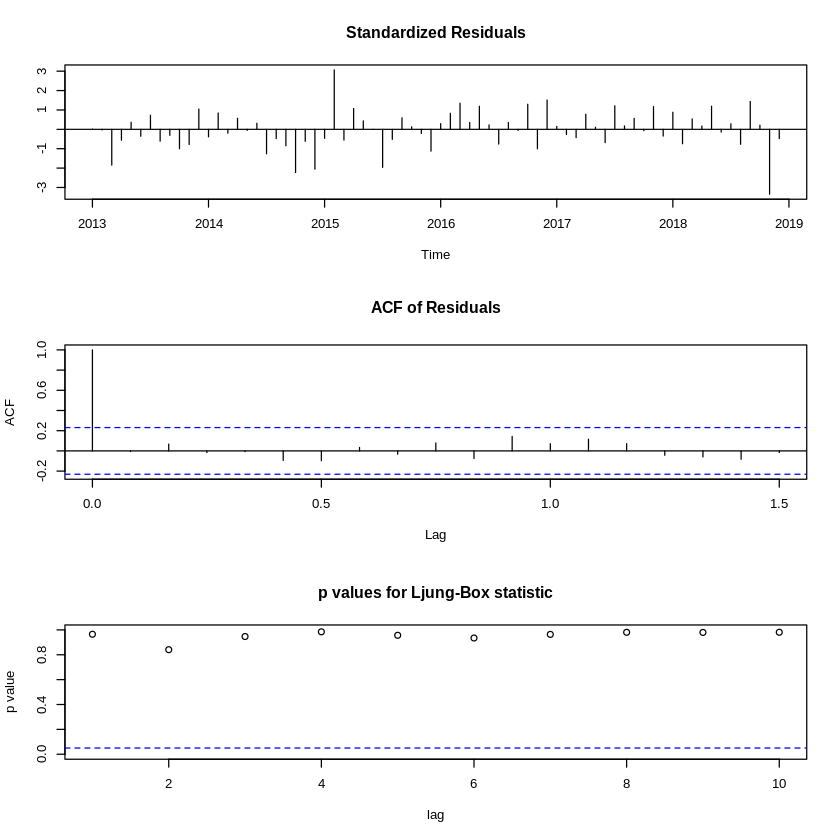

In [22]:
summary(modelo1)
tsdiag(modelo1)

### O Primeiro gráfico "Standardized Residuals" indica que a distribuição dos resíduos apresentam média = 0 e variância constante. 
###No segundo gráfico observamos que os erros não estão autocorrelacionados ao longo do tempo, uma vez que os lags estão na parte azul(intervalo de confiança).ou seja próximos de zero, e sem tendências.
###Enquanto, no terceiro gráfico mostra que as autocorrelações em todos os lags observados não são significativas,pois no teste de ljung-box, os p-valores são grandes.
### Portanto, isso nos leva a crer que o modelo capturou boa parte da estrutura de autocorrelação da série temporal. 
### Então as suposições do modelo foram verificadas.

# Além disso, podemos observar algumas medidas como o O erro médio absoluto percentual (MAPE) expressa precisão como uma porcentagem do erro. No exemplo,  o MAPE é 5.35, em média, a previsão está incorreta em 5,35%.



In [23]:
Box.test(residuals(modelo1),type="Ljung-Box")


	Box-Ljung test

data:  residuals(modelo1)
X-squared = 0.0019019, df = 1, p-value = 0.9652


Teste de Ruído Branco de Box-Ljung , com as seguintes hipóteses:

H0 : Há Ruído Branco, modelo não exibe falha de ajuste.

H1 : Não há Ruído Branco, o modelo exibe falha de ajuste.

Regra de decisão: Quando (p-value) é > 0,05 aceitamos H0 , ou seja, há evidência de que o modelo não exibe falha de ajuste.

Como (p-value) é > 0,05 aceitamos H0 , ou seja, há evidência de que o modelo não exibe falha de ajuste.

### Uma vez verificando os resíduos vamos realizar a previsão para os próximos 10 meses

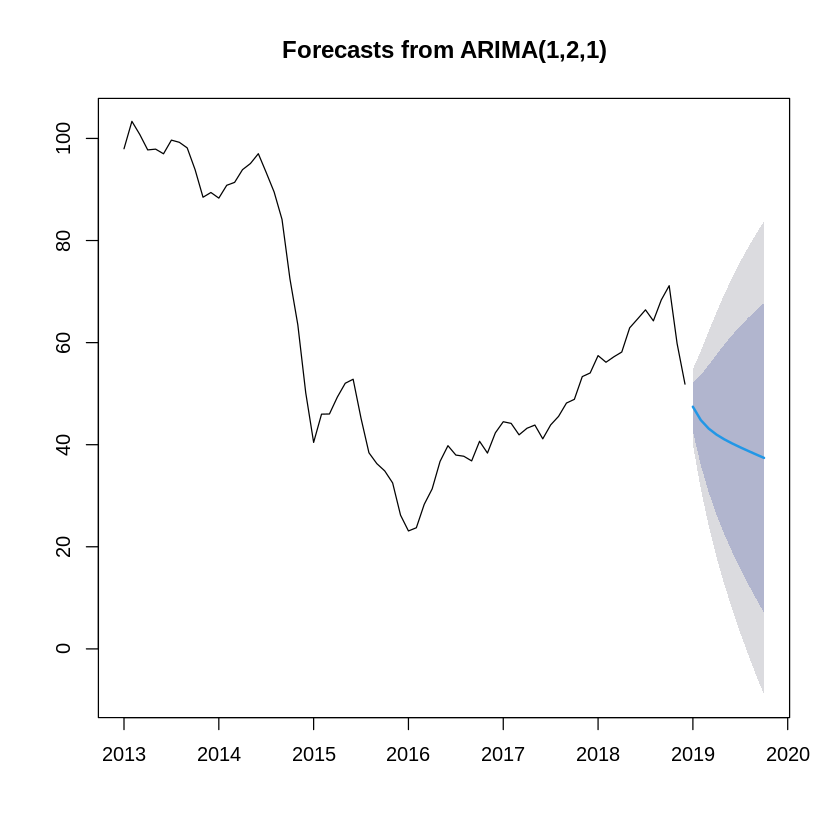

In [24]:
forecasting=forecast::forecast(modelo1,h=10)
plot(forecasting)

In [ ]:
forecasting

In [ ]:
df_series